<a href="https://colab.research.google.com/github/ProkhorKondratev/KondratevPV_Neural/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%962.%20%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа №2. Задание 2.

1.1 Загрузка данных

In [29]:
import cv2
import os
import numpy as np

data_path = '/content/drive/MyDrive/Neural_class_data'
class_dirs = []

data = []
labels = []

for file in os.listdir(data_path):
  class_dirs.append(os.path.join(data_path,file))

for class_dir in class_dirs:
  for image in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image)
    image_label = image_path.split(os.path.sep)[-2]
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
    labels.append(image_label)

print(f'Загружено {len(data)} изображений и {len(labels)} меток')

Загружено 3000 изображений и 3000 меток


1.2 Нормализация данных

In [37]:
from keras.utils import to_categorical
data = np.array(data, dtype="float") / 255.0

label_to_int = {"zebra": 0, "lions": 1, "elephant": 2}
int_labels = [label_to_int[label] for label in labels]

labels = to_categorical(int_labels)
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

1.3 Разбивка на обучающую выборку и выборку валидации

In [38]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)

1.4 Создание архитектуры нейронной сети

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

model = Sequential()

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

1.5 Компиляция нейронной сети

In [40]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
print(f'Используемый оптимизатор: {model.optimizer.name}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)              

1.6 Обучение нейронной сети

In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_valid, y_valid), verbose=True)

1.7 Оценка критерия качества работы нейронной сети с помощью представления на графике

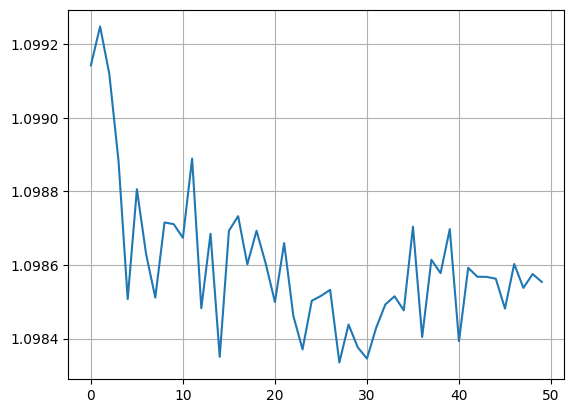

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

1.8 Оценка критерия качества работы нейронной сети на тестовой выборке

In [44]:
neural_loss = model.evaluate(X_test, y_test)
neural_loss

19/19 [==============================] - 1s 23ms/step - loss: 1.1002 - accuracy: 0.3100


[1.1002037525177002, 0.3100000023841858]